In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import os
import sys

from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.io import loadmat

basedir = '/project/vitelli/jonathan/REDO_fruitfly/'
sys.path.insert(0, os.path.join(basedir, 'src'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from build_derivative_library import *
datadir = '/project/vitelli/jonathan/REDO_fruitfly/MLData'
build_3D_library(os.path.join(datadir, 'WT/ECad-GFP'), 
                 'test.h5',
                 assemble_tensor_library,
                 fast_dev_run=True,
                 tensor_label='c',
                 vector_label='v')

  0%|          | 0/468 [00:00<?, ?it/s]

0 202001280915 -1.884000 0 /project/vitelli/jonathan/REDO_fruitfly/flydrive.synology.me/minimalData/Atlas_Data/WT/ECad-GFP/202001280915


  0%|          | 0/468 [00:16<?, ?it/s]


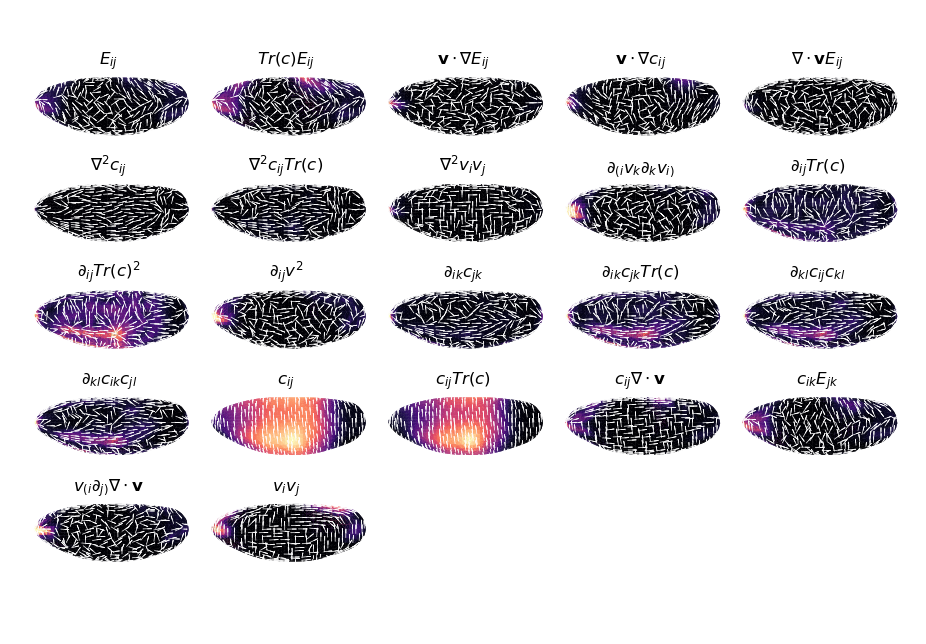

In [47]:
from plot_utils import *
import matplotlib.pyplot as plt

with h5py.File('../../MLData/WT/ECad-GFP/test.h5', 'r') as h5f:
    gg = h5f[list(h5f.keys())[0]]
    gt = gg[list(gg.keys())[-1]]
    
    from math import ceil
    ncols = 5
    nrows = ceil(len(gt.keys()) / ncols)

    plt.rcParams['font.size'] = 6
    fig, ax = plt.subplots(nrows, ncols, dpi=200, subplot_kw=dict(projection='3d'))

    for a, key in zip(ax.flatten(), gt.keys()):
        vmax = 3 if 'partial' in key else None
        plot_tangent_space_tensor(a, np.array(gt[key]), title='$%s$' % key, vmax=vmax)
        
    for a in ax.flatten()[len(gt.keys()):]:
        a.axis('off')
        a.patch.set_alpha(0.)
    fig.subplots_adjust(wspace=-.2, hspace=-.4)